In [1]:
import numpy as np
from itertools import permutations
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

# Functions to solve TSP

In [2]:
# Define a function to calculate the length of a tour
def tour_length(tour, graph):
    length = 0
    for i in range(len(tour) - 1):
        #print(graph[tour[i]][tour[i+1]])
        length += graph[tour[i]][tour[i+1]]
    return length

In [3]:
#TSP solver using 2-opt
def two_opt_tsp_tour_solver(graph, visit_nodes):
    
    # Generate all possible permutations of visit_nodes
    visit_permutations = list(permutations(visit_nodes))

    # Initialize the shortest tour and its length
    shortest_tour = None
    shortest_length = np.inf

    # Iterate over all permutations of visit_nodes
    for visit_perm in visit_permutations:
        
        # Insert the start node 'R' at the beginning of the tour
        tour = [0] + list(visit_perm)

        # Perform 2-opt algorithm
        improved = True
        while improved:
            improved = False
            for i in range(1, len(tour) - 2):
                for j in range(i + 1, len(tour) - 1):
                    new_tour = tour.copy()
                    new_tour[i:j+1] = tour[j:i-1:-1]
                    if tour_length(new_tour, graph) < tour_length(tour, graph):
                        tour = new_tour
                        improved = True

        # Update the shortest tour and its length
        if tour_length(tour, graph) < shortest_length:
            shortest_tour = tour
            shortest_length = tour_length(tour, graph)
    
    # Return the final tour and its length
    return (shortest_tour, shortest_length)

In [4]:
#Simple TSP solver

def simple_tsp_tour_solver(graph, visit_nodes):
    
    # Generate all possible permutations of visit_nodes
    visit_permutations = list(permutations(visit_nodes))

    # Initialize the shortest tour and its length
    shortest_tour = None
    shortest_length = np.inf

    # Iterate over all permutations of visit_nodes
    for visit_perm in visit_permutations:
        
        # Insert the start node 'R' at the beginning of the tour
        tour = [0] + list(visit_perm)

        # Update the shortest tour and its length
        #print(tour, tour_length(tour, graph))
        if tour_length(tour, graph) < shortest_length:
            shortest_tour = tour
            shortest_length = tour_length(tour, graph)
    
    # Return the final tour and its length
    return (shortest_tour, shortest_length)

In [5]:
def graph_visualization(nodes):
    #print(nodes)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    pairs = list(combinations(nodes, 2))
    for pair in pairs:
        G.add_edge(pair[0], pair[1])
    return G

In [6]:
def solution_visualization(solution_nodes):
    G = nx.Graph()
    G.add_nodes_from(solution_nodes)
    for i in range(0, len(solution_nodes) -1):
        G.add_edge(solution_nodes[i], solution_nodes[i + 1])
    return G

In [7]:
def generate_path(nodes, index_ls):
    path = []
    for index in index_ls:
        path.append(nodes[index])
    return path

In [8]:
def generate_path_coor(coor_matrix, index_ls):
    path = []
    #print("matrix:", coor_matrix)
    for index in index_ls:
        #print(index)
        #print(coor_matrix[index,0])
        path.append((coor_matrix[index, 0], coor_matrix[index, 1]))
    return path

In [9]:
#Euclidean distance calculator
def eu_dist(coor_matrix):
    #print(coor_matrix[:, np.newaxis])
    sq_sub = (coor_matrix[:, np.newaxis] - coor_matrix)**2
    #print(sq_sub)
    #print('-------------------')
    eu_dist = np.sqrt(np.sum(sq_sub, axis=2))
    #print(eu_dist)
    return eu_dist

In [10]:
def cost_matrix_calc(coor_matrix, prob, w_l, w_d):
    #Calculate eculidean distance pairwise between nodes
    sq_sub = (coor_matrix[:, np.newaxis] - coor_matrix)**2
    eu_dist = np.sqrt(np.sum(sq_sub, axis=2))
    #Finds the largest distance to nomalize the matrix values
    max_val = np.amax(eu_dist)
    graph_norm = eu_dist / max_val
    #Multiply the likelihood matrix and the distance matrix by their weights
    graph_w = graph_norm * w_d
    prob_w = prob * w_l
    #Calculate the cost of from one node to another using the cost formula
    cost_graph = graph_w - prob_w.reshape(prob_w.shape[1], prob_w.shape[0])
    return cost_graph

# Tests to evaluate the TSP algorithms

### Test 1

In [11]:
#Row order: R, C, D, K, T, L 
node_location_arr = np.array([[5.182, 4.369],
                              [3.887, 5.766],
                              [1.943, 4.369],
                              [2.591, 7.976]])

In [12]:
#Test1
# Rows: 0:R, 1:C, 2:D, 3:K
graph = eu_dist(node_location_arr)
print(graph)
nodes_to_visit = [1,2,3]

[[0.         1.90489737 3.239      4.44114062]
 [1.90489737 0.         2.39389745 2.56197502]
 [3.239      2.39389745 0.         3.6647446 ]
 [4.44114062 2.56197502 3.6647446  0.        ]]


In [13]:
#Test1

%timeit solution = two_opt_tsp_tour_solver(graph, nodes_to_visit)
#print(solution)

33.1 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
#Test1

%timeit solution = simple_tsp_tour_solver(graph, nodes_to_visit)
#print(solution)

8.44 µs ± 237 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
#Test1 Solution
# Rows: 0:R, 1:C, 2:D, 3:K
solution = simple_tsp_tour_solver(graph, nodes_to_visit)
print(solution)

([0, 1, 2, 3], 7.963539424618613)


### Test 2

In [16]:
#Test2 Solution
#Row order: R, C, T, L 
node_location_arr = np.array([[5.182, 4.369],
                              [3.887, 5.766],
                              [7.125, 4.3],
                             [8.421, 1.486]])

In [17]:
#Test2
# Rows: 0:R, 1:C, 2:T, 3:L
graph = eu_dist(node_location_arr)
print(graph)
nodes_to_visit = [1,2,3]

[[0.         1.90489737 1.94422478 4.3362207 ]
 [1.90489737 0.         3.55440572 6.23502654]
 [1.94422478 3.55440572 0.         3.09809813]
 [4.3362207  6.23502654 3.09809813 0.        ]]


In [18]:
#Test2
%timeit solution = two_opt_tsp_tour_solver(graph, nodes_to_visit)
#print(solution)

32.8 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
#Test2
%timeit solution = simple_tsp_tour_solver(graph, nodes_to_visit)
#print(solution)

8.4 µs ± 196 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [20]:
#Test2
solution = simple_tsp_tour_solver(graph, nodes_to_visit)
print(solution)

([0, 1, 2, 3], 8.557401215687433)


# Tests for the simulated environment using euclidean distance

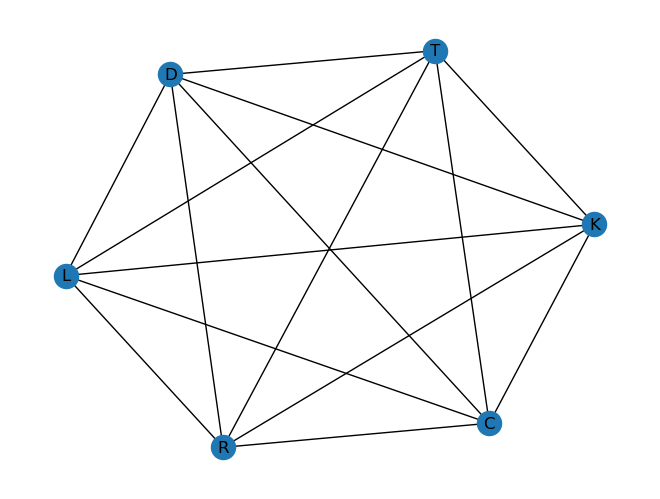

In [21]:
#Environment
node_list = ['R','C', 'D', 'K', 'L', 'T']
graph_plot = graph_visualization(node_list)
nx.draw(graph_plot, with_labels=True)
plt.show()

### Test 3

In [22]:
#Test3
#Row order: R, C, D, K, L, T 
node_location_arr = np.array([[5.182, 4.369],
                              [3.887, 5.766],
                              [1.943, 4.369],
                              [2.591, 7.976],
                              [8.421, 1.486],
                              [7.125, 4.3]])

In [23]:
#Test3
# Rows: 0:R, 1:C, 2:D, 3:K, 4:L, 5:T
graph = eu_dist(node_location_arr)
print(graph)
nodes_to_visit = [1,2,3,4,5]

[[0.         1.90489737 3.239      4.44114062 4.3362207  1.94422478]
 [1.90489737 0.         2.39389745 2.56197502 6.23502654 3.55440572]
 [3.239      2.39389745 0.         3.6647446  7.0905693  5.18245936]
 [4.44114062 2.56197502 3.6647446  0.         8.72404723 5.83696257]
 [4.3362207  6.23502654 7.0905693  8.72404723 0.         3.09809813]
 [1.94422478 3.55440572 5.18245936 5.83696257 3.09809813 0.        ]]


In [24]:
#Test3
%timeit solution = two_opt_tsp_tour_solver(graph, nodes_to_visit)
#print(solution)

6.03 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
#Test3
%timeit solution = simple_tsp_tour_solver(graph, nodes_to_visit)
#print(solution)

198 µs ± 4.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


([0, 2, 3, 1, 5, 4], 16.118223464806103)


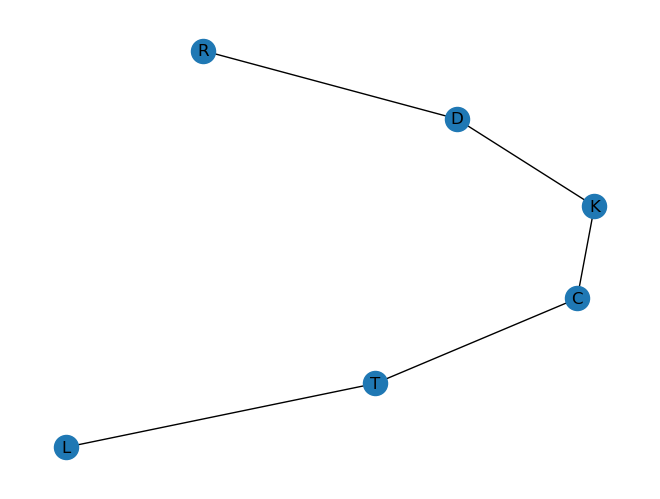

In [26]:
#Test3
solution = simple_tsp_tour_solver(graph, nodes_to_visit)
print(solution)
solution_nodes = generate_path(node_list, solution[0])
solution_plot = solution_visualization(solution_nodes)
nx.draw(solution_plot, with_labels=True)
plt.show()

### Test 4

In [27]:
#Test4
#Row order: R, C, D, K, L, T 
node_location_arr = np.array([[6.478, 1.486],
                              [3.887, 5.766],
                              [1.943, 4.369],
                              [2.591, 7.976],
                              [8.421, 1.486],
                              [7.125, 4.3]])

In [28]:
#Test4
# Rows: 0:R, 1:C, 2:D, 3:K, 4:T, 5:L
graph = eu_dist(node_location_arr)
print(graph)
nodes_to_visit = [1,2,3,4,5]

[[0.         5.0031671  5.37381745 7.56497647 1.943      2.88742186]
 [5.0031671  0.         2.39389745 2.56197502 6.23502654 3.55440572]
 [5.37381745 2.39389745 0.         3.6647446  7.0905693  5.18245936]
 [7.56497647 2.56197502 3.6647446  0.         8.72404723 5.83696257]
 [1.943      6.23502654 7.0905693  8.72404723 0.         3.09809813]
 [2.88742186 3.55440572 5.18245936 5.83696257 3.09809813 0.        ]]


([0, 4, 5, 1, 2, 3], 14.65414589517869)


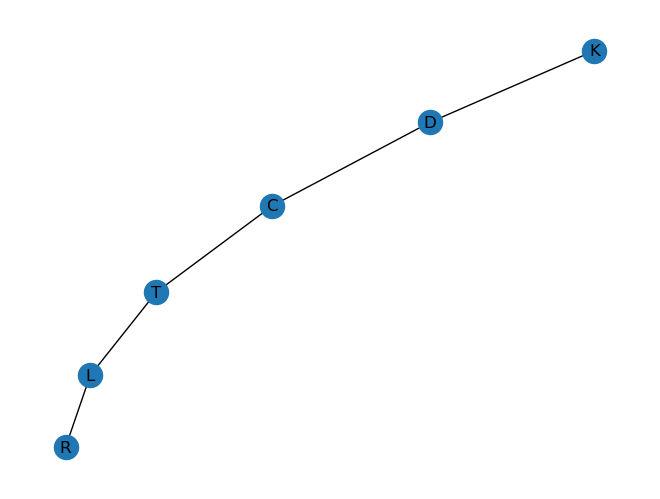

In [29]:
#Test4
solution = simple_tsp_tour_solver(graph, nodes_to_visit)
print(solution)
solution_nodes = generate_path(node_list, solution[0])
solution_plot = solution_visualization(solution_nodes)
nx.draw(solution_plot, with_labels=True)
plt.show()

# Test 5: Likelihood / Distance Cost Function

In [30]:
#Test with a cost function that accounts for likelihood and distance of the nodes

#Test5 Solution
#Row order: R, C, L, K 
node_location_arr = np.array([[5.182, 4.369],
                              [3.887, 5.766],
                              [8.421, 1.486],
                              [2.591, 7.976]])

In [31]:
#Test5
#With the node's coordinates we calculate the euclidean distance pairwise.
# Rows: 0:R, 1:C, 2:L, 3:K
graph_eu_dist = eu_dist(node_location_arr)
print(graph_eu_dist)
nodes_to_visit = [1,2,3]

[[0.         1.90489737 4.3362207  4.44114062]
 [1.90489737 0.         6.23502654 2.56197502]
 [4.3362207  6.23502654 0.         8.72404723]
 [4.44114062 2.56197502 8.72404723 0.        ]]


In [32]:
#We find the largest distance in the matrix to normalize the values.
print("Max value: ", np.amax(graph_eu_dist))
graph_norm = graph_eu_dist / np.amax(graph_eu_dist)
print("Graph: \n", graph_norm)

Max value:  8.724047225915275
Graph: 
 [[0.         0.21835019 0.49704232 0.50906884]
 [0.21835019 0.         0.71469427 0.29366817]
 [0.49704232 0.71469427 0.         1.        ]
 [0.50906884 0.29366817 1.         0.        ]]


In [33]:
# Add a matrix with the ordered coordinates.

In [34]:
#Test5
#Likelihood Array
# Rows: 0:R, 1:C, 2:L, 3:K
prob_array = np.array([[0.0],
                      [0.05],
                      [0.5],
                      [0.05]])

In [35]:
#Weights for our cost function C(p) = w_d*Di - w_l*Li 
#Di = distance between nodes.
#Li = Likelihood of the node.
#w_l = weight likelihood, #w_d = weight distance
w_l = 0.8
w_d = 0.2

In [36]:
#Multiply each array by its weight

graph_w = graph_norm*w_d
prob_array = prob_array*w_l

print(graph_w, '\n-----------')
print(prob_array)
print(prob_array.shape)

[[0.         0.04367004 0.09940846 0.10181377]
 [0.04367004 0.         0.14293885 0.05873363]
 [0.09940846 0.14293885 0.         0.2       ]
 [0.10181377 0.05873363 0.2        0.        ]] 
-----------
[[0.  ]
 [0.04]
 [0.4 ]
 [0.04]]
(4, 1)


In [37]:
#We build the cost graph by applying the cost formula
# Rows: 0:R, 1:C, 2:L, 3:K
cost_graph = graph_w - prob_array.reshape(prob_array.shape[1], prob_array.shape[0])
print(cost_graph)

[[ 0.          0.00367004 -0.30059154  0.06181377]
 [ 0.04367004 -0.04       -0.25706115  0.01873363]
 [ 0.09940846  0.10293885 -0.4         0.16      ]
 [ 0.10181377  0.01873363 -0.2        -0.04      ]]


In [38]:
#We find the path with the lowest cost
#Test 5
# Rows: 0:R, 1:C, 2:L, 3:K
solution = simple_tsp_tour_solver(cost_graph, nodes_to_visit)
print(solution)

([0, 2, 1, 3], -0.1789190469133469)


### Comparation of two paths that are very close in cost using euclidean distance

In [39]:
tour_length(solution[0], cost_graph)

-0.1789190469133469

In [40]:
tour_length([0, 3, 1, 2], cost_graph)

-0.17651374323207855

In [41]:
tour_length(solution[0], graph_eu_dist)

13.133222267757716

In [42]:
tour_length([0, 3, 1, 2], graph_eu_dist)

13.238142182297981

# Test 6: the new cost function with the complete environment and a new start point

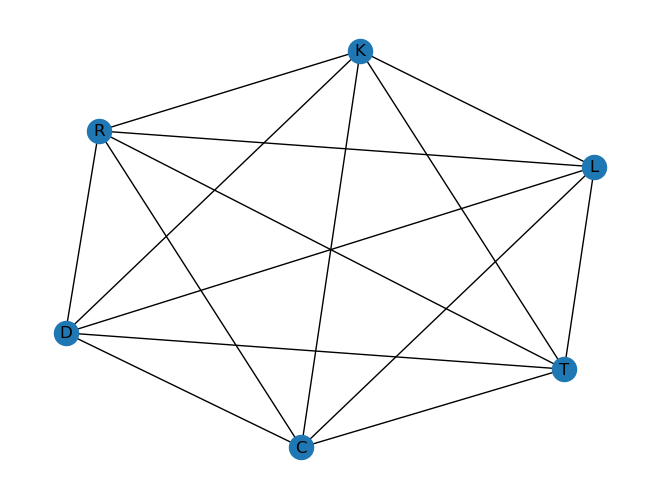

In [43]:
#Environment
node_list = ['R','C', 'D', 'K', 'L', 'T']
graph_plot = graph_visualization(node_list)
nx.draw(graph_plot, with_labels=True)
plt.show()

In [44]:
#Test 6
#Row order: R, C, D, K, L, T 
location_arr = np.array([[1.2955, 5.766],
                              [3.887, 5.766],
                              [1.943, 4.369],
                              [2.591, 7.976],
                              [8.421, 1.486],
                              [7.125, 4.3]])
nodes_to_visit = [1,2,3,4,5]
print(location_arr)

[[1.2955 5.766 ]
 [3.887  5.766 ]
 [1.943  4.369 ]
 [2.591  7.976 ]
 [8.421  1.486 ]
 [7.125  4.3   ]]


In [45]:
w_l = 0.8
w_d = 0.2

#Test5
#Likelihood Array
# Rows: 0:R, 1:C, 2:D, 3:K , 4:L, 5:T
prob_array = np.array([[0.0],
                      [0.05],
                      [0.1],
                      [0.05],
                      [0.5],
                      [0.3]])
print(prob_array)

[[0.  ]
 [0.05]
 [0.1 ]
 [0.05]
 [0.5 ]
 [0.3 ]]


In [46]:
graph_eu_dist = eu_dist(location_arr)
print(graph_eu_dist)

[[0.         2.5915     1.53976143 2.56172213 8.31210865 6.01100875]
 [2.5915     0.         2.39389745 2.56197502 6.23502654 3.55440572]
 [1.53976143 2.39389745 0.         3.6647446  7.0905693  5.18245936]
 [2.56172213 2.56197502 3.6647446  0.         8.72404723 5.83696257]
 [8.31210865 6.23502654 7.0905693  8.72404723 0.         3.09809813]
 [6.01100875 3.55440572 5.18245936 5.83696257 3.09809813 0.        ]]


In [47]:
#Normalize eu dist graph

max_val = np.amax(graph_eu_dist)
graph_norm = graph_eu_dist / max_val
print(graph_norm)

[[0.         0.2970525  0.17649623 0.29363919 0.95278125 0.68901607]
 [0.2970525  0.         0.27440217 0.29366817 0.71469427 0.40742624]
 [0.17649623 0.27440217 0.         0.42007391 0.81276145 0.59404302]
 [0.29363919 0.29366817 0.42007391 0.         1.         0.66906591]
 [0.95278125 0.71469427 0.81276145 1.         0.         0.35512166]
 [0.68901607 0.40742624 0.59404302 0.66906591 0.35512166 0.        ]]


In [48]:
#Multiply matrices by its weights
graph_w = graph_norm * w_d
prob_array = prob_array * w_l

print(graph_w, '\n------------')
print(prob_array)

[[0.         0.0594105  0.03529925 0.05872784 0.19055625 0.13780321]
 [0.0594105  0.         0.05488043 0.05873363 0.14293885 0.08148525]
 [0.03529925 0.05488043 0.         0.08401478 0.16255229 0.1188086 ]
 [0.05872784 0.05873363 0.08401478 0.         0.2        0.13381318]
 [0.19055625 0.14293885 0.16255229 0.2        0.         0.07102433]
 [0.13780321 0.08148525 0.1188086  0.13381318 0.07102433 0.        ]] 
------------
[[0.  ]
 [0.04]
 [0.08]
 [0.04]
 [0.4 ]
 [0.24]]


In [49]:
#Apply the cost function to the matrices to obtain the cost matrix
# Rows: 0:R, 1:C, 2:D, 3:K , 4:L, 5:T
cost_graph = graph_w - prob_array.reshape(prob_array.shape[1], prob_array.shape[0])
print(cost_graph)

[[ 0.          0.0194105  -0.04470075  0.01872784 -0.20944375 -0.10219679]
 [ 0.0594105  -0.04       -0.02511957  0.01873363 -0.25706115 -0.15851475]
 [ 0.03529925  0.01488043 -0.08        0.04401478 -0.23744771 -0.1211914 ]
 [ 0.05872784  0.01873363  0.00401478 -0.04       -0.2        -0.10618682]
 [ 0.19055625  0.10293885  0.08255229  0.16       -0.4        -0.16897567]
 [ 0.13780321  0.04148525  0.0388086   0.09381318 -0.32897567 -0.24      ]]


([0, 1, 2, 3], -0.7627527700839567)


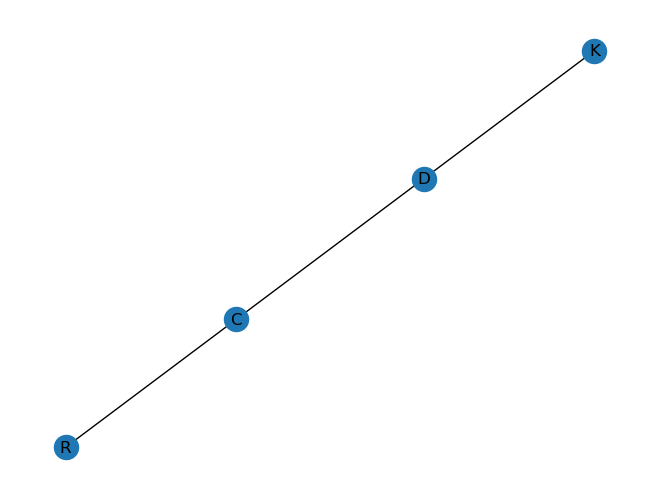

[(5.182, 4.369), (3.887, 5.766), (7.125, 4.3), (8.421, 1.486)]


In [60]:
#Test 6
solution = simple_tsp_tour_solver(cost_graph, nodes_to_visit)
print(solution)
solution_nodes = generate_path(node_list, solution[0])
solution_plot = solution_visualization(solution_nodes)
nx.draw(solution_plot, with_labels=True)
plt.show()
coor_path = generate_path_coor(location_arr, solution[0])
print(coor_path)

# Final Test with new cost_graph_calc function and returning the coordinates of the best path.

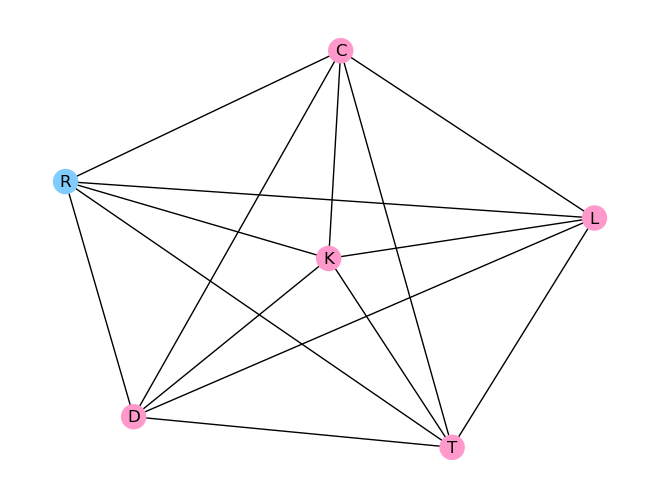

In [51]:
#Environment
node_list = ['R','C', 'D', 'K', 'L', 'T']
node_colors = ['#80ccff', '#ff99cc', '#ff99cc', '#ff99cc','#ff99cc','#ff99cc']
graph_plot = graph_visualization(node_list)
nx.draw(graph_plot, with_labels=True, node_color=node_colors)
plt.show()

In [65]:
# Rows: 0:R, 1:C, 2:D, 3:K , 4:L, 5:T
location_arr = np.array([[6.478, 1.486],
                              [3.887, 5.766],
                              [1.943, 4.369],
                              [2.591, 7.976],
                              [8.421, 1.486],
                              [7.125, 4.3]])
nodes_to_visit = [1,2,3,4,5]
print(location_arr)

[[6.478 1.486]
 [3.887 5.766]
 [1.943 4.369]
 [2.591 7.976]
 [8.421 1.486]
 [7.125 4.3  ]]


In [66]:
w_l = 0.9
w_d = 0.1

#Test5
#Likelihood Array
# Rows: 0:R, 1:C, 2:D, 3:K , 4:L, 5:T
prob_array = np.array([[0.0],
                      [0.05],
                      [0.1],
                      [0.05],
                      [0.3],
                      [0.5]])
print(prob_array)

[[0.  ]
 [0.05]
 [0.1 ]
 [0.05]
 [0.3 ]
 [0.5 ]]


In [67]:
cost_graph = cost_matrix_calc(location_arr, prob_array, w_l, w_d)
print(cost_graph)

[[ 0.          0.01234915 -0.02840224  0.04171407 -0.24772823 -0.41690273]
 [ 0.05734915 -0.045      -0.06255978 -0.01563318 -0.19853057 -0.40925738]
 [ 0.06159776 -0.01755978 -0.09       -0.00299261 -0.18872385 -0.3905957 ]
 [ 0.08671407 -0.01563318 -0.04799261 -0.045      -0.17       -0.38309341]
 [ 0.02227177  0.02646943 -0.00872385  0.055      -0.27       -0.41448783]
 [ 0.03309727 -0.00425738 -0.0305957   0.02190659 -0.23448783 -0.45      ]]


([0, 4, 5, 1, 2, 3], -0.7320258302631867)
[(6.478, 1.486), (8.421, 1.486), (7.125, 4.3), (3.887, 5.766), (1.943, 4.369), (2.591, 7.976)]


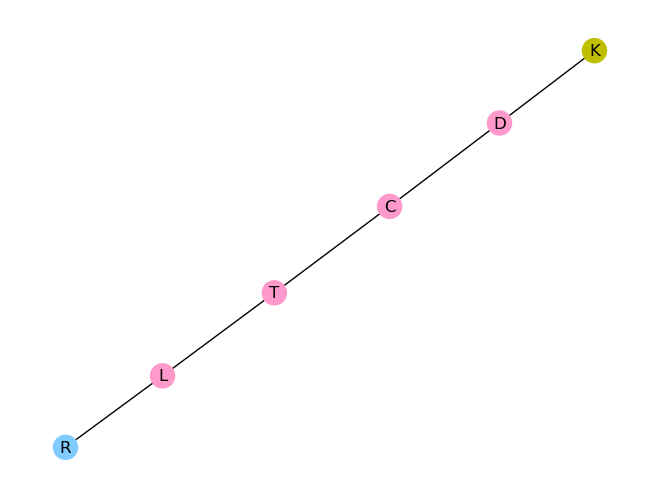

In [68]:
#Test 6
solution = simple_tsp_tour_solver(cost_graph, nodes_to_visit)
print(solution)
solution_nodes = generate_path(node_list, solution[0])
solution_plot = solution_visualization(solution_nodes)
coor_path = generate_path_coor(location_arr, solution[0])
print(coor_path)
node_colors = ['#80ccff', '#ff99cc', '#ff99cc', '#ff99cc','#ff99cc','y']
nx.draw(solution_plot, with_labels=True, node_color=node_colors)
plt.show()

# Final Cost Function Test

In [69]:
# Rows: 0:R, 1:C, 2:L, 3:T
location_arr = np.array([[5.182, 4.369],
                         [2.591, 7.976],
                         [7.125, 4.3],
                         [8.421, 1.486]])
nodes_to_visit = [1,2,3]
print(location_arr)

[[5.182 4.369]
 [2.591 7.976]
 [7.125 4.3  ]
 [8.421 1.486]]


In [70]:
w_l = 0.9
w_d = 0.1

#Likelihood Array
# Rows: 0:R, 1:C, 2:T, 3:L
prob_array = np.array([[0.0],
                      [0.1],
                      [0.8],
                      [0.1]])
print(prob_array)

[[0. ]
 [0.1]
 [0.8]
 [0.1]]


In [71]:
cost_graph = cost_matrix_calc(location_arr, prob_array, w_l, w_d)
print(cost_graph)

[[ 0.         -0.03909312 -0.69771419 -0.04029577]
 [ 0.05090688 -0.09       -0.65309341  0.01      ]
 [ 0.02228581 -0.02309341 -0.72       -0.05448783]
 [ 0.04970423  0.01       -0.68448783 -0.09      ]]


In [72]:
# Rows: 0:R, 1:C, 2:L
solution = simple_tsp_tour_solver(cost_graph, nodes_to_visit)
print(solution)
coor_path = generate_path_coor(location_arr, solution[0])
print(coor_path)

([0, 3, 2, 1], -0.7478770110525172)
[(5.182, 4.369), (8.421, 1.486), (7.125, 4.3), (2.591, 7.976)]
